In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/Colab Notebooks/Adopt A Buddy Challenge/

/content/gdrive/My Drive/Colab Notebooks/Adopt A Buddy Challenge


In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape, test.shape)

(18834, 11) (8072, 9)


In [3]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [4]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [5]:
le = LabelEncoder()
train['color_type'] = le.fit_transform(train['color_type']) 
test['color_type'] = le.fit_transform(test['color_type'])

In [6]:
train.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [7]:
test.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64

In [8]:
train['condition'].fillna((train['condition'].mean()), inplace=True)
test['condition'].fillna((test['condition'].mean()), inplace=True)

In [9]:
train.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
dtype: int64

In [10]:
test.isnull().sum()

pet_id          0
issue_date      0
listing_date    0
condition       0
color_type      0
length(m)       0
height(cm)      0
X1              0
X2              0
dtype: int64

In [11]:
t1 = pd.to_datetime(train['issue_date'])
t2 = pd.to_datetime(train['listing_date'])

train['time_difference_hours'] = (t2 - t1).dt.total_seconds()/3600

In [12]:
t1 = pd.to_datetime(test['issue_date'])
t2 = pd.to_datetime(test['listing_date'])

test['time_difference_hours'] = (t2 - t1).dt.total_seconds()/3600

In [13]:
train = train.drop(['issue_date'], axis = 1)
train = train.drop(['listing_date'], axis = 1)
train.shape

(18834, 10)

In [14]:
train.head()

,pet_id,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,time_difference_hours
0,ANSL_69903,2.00000,18,0.80,7.78,13,9,0.0,1,1768.416667
1,ANSL_66892,1.00000,53,0.72,14.19,13,9,0.0,2,44705.783333
2,ANSL_69750,0.88339,15,0.15,40.90,15,4,2.0,4,18056.400000
3,ANSL_71623,1.00000,53,0.62,17.82,0,1,0.0,2,18138.500000
4,ANSL_57969,2.00000,2,0.50,11.06,18,4,0.0,1,1257.633333


In [15]:
test = test.drop(['issue_date'], axis = 1)
test = test.drop(['listing_date'], axis = 1)
test.shape

(8072, 8)

In [16]:
test.head()

,pet_id,condition,color_type,length(m),height(cm),X1,X2,time_difference_hours
0,ANSL_75005,0.0,2,0.87,42.73,0,7,105711.583333
1,ANSL_76663,1.0,36,0.06,6.71,0,1,4193.400000
2,ANSL_58259,1.0,2,0.24,41.21,0,7,47992.850000
3,ANSL_67171,1.0,2,0.29,8.46,7,1,27559.416667
4,ANSL_72871,1.0,14,0.71,30.92,0,7,11125.700000


In [17]:
t = train.pop('time_difference_hours')
train.insert(7,'time_difference_hours', t)
train.head()

,pet_id,condition,color_type,length(m),height(cm),X1,X2,time_difference_hours,breed_category,pet_category
0,ANSL_69903,2.00000,18,0.80,7.78,13,9,1768.416667,0.0,1
1,ANSL_66892,1.00000,53,0.72,14.19,13,9,44705.783333,0.0,2
2,ANSL_69750,0.88339,15,0.15,40.90,15,4,18056.400000,2.0,4
3,ANSL_71623,1.00000,53,0.62,17.82,0,1,18138.500000,0.0,2
4,ANSL_57969,2.00000,2,0.50,11.06,18,4,1257.633333,0.0,1


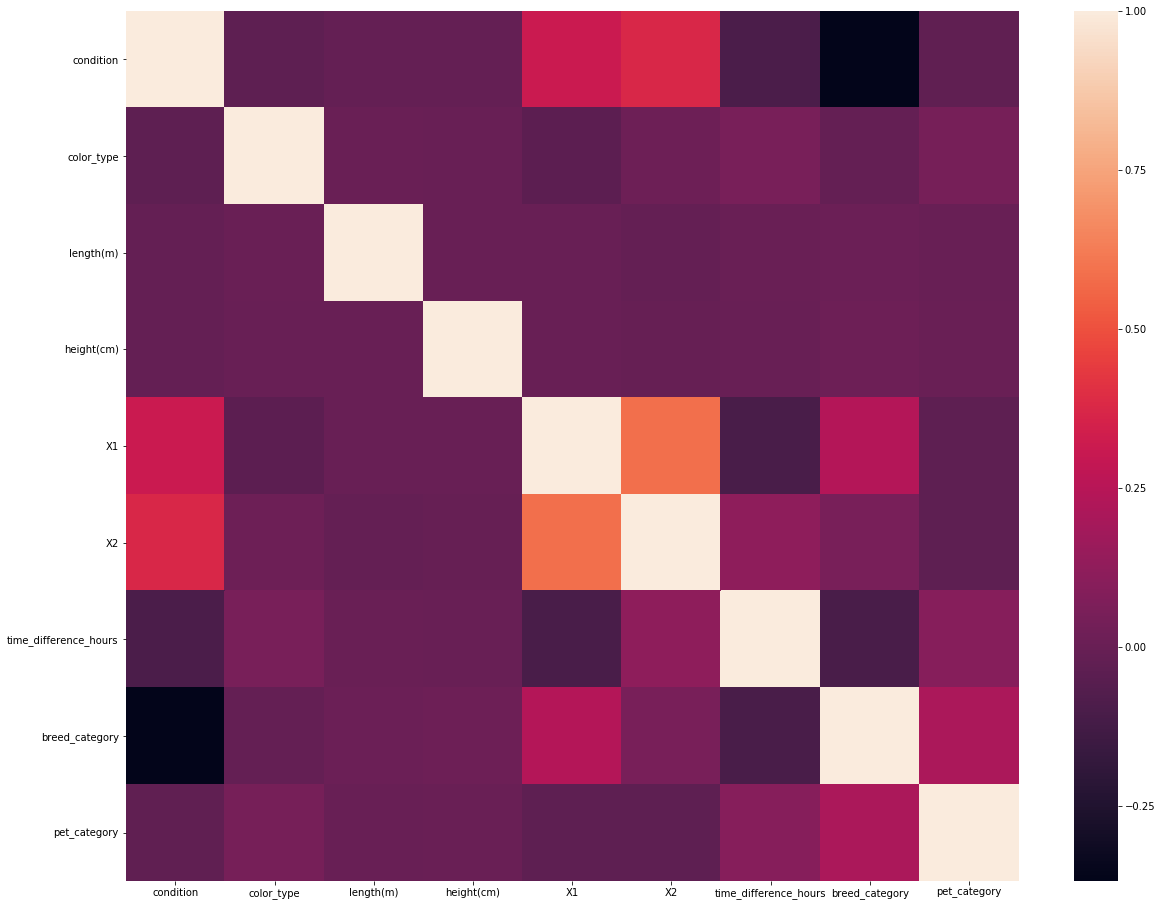

In [18]:
plt.figure(figsize=(20,16))
sns.heatmap(train.corr())

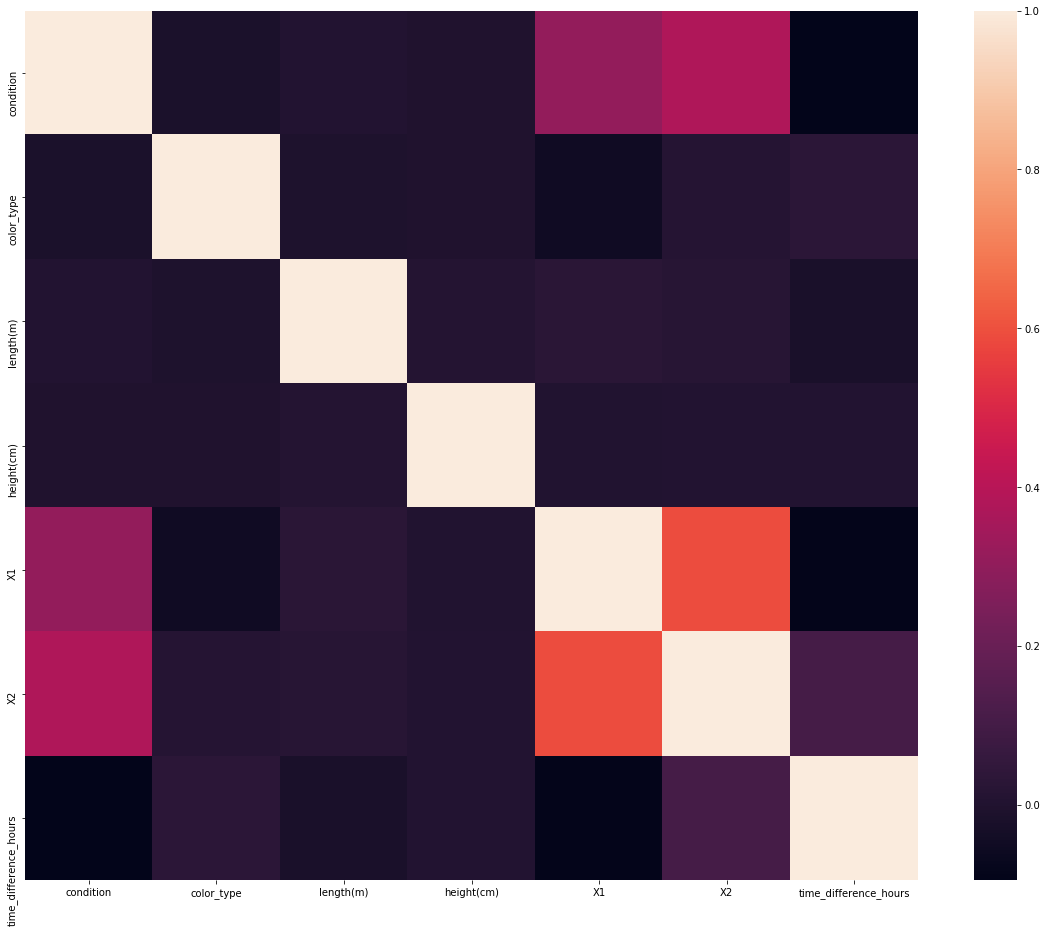

In [19]:
plt.figure(figsize=(20,16))
sns.heatmap(test.corr())

In [20]:
train.to_csv("Features_Train.csv", index = False)

In [21]:
test.to_csv("Features_Test.csv", index = False)